In [1]:
# Task 4: Predicting Insurance Claim Amounts
# =============================

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [2]:
# 1. Load Dataset
# =============================

df = pd.read_csv("insurance_data.csv")  # Change filename if needed

In [3]:
# 2. Basic Data Checks
# =============================

print("First 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nData Types:")
print(df.dtypes)

# Check categorical columns
for col in ['gender', 'smoker', 'region', 'diabetic']:
    if col in df.columns:
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts())


First 5 rows:
   index  PatientID   age gender   bmi  bloodpressure diabetic  children  \
0      0          1  39.0   male  23.2             91      Yes         0   
1      1          2  24.0   male  30.1             87       No         0   
2      2          3   NaN   male  33.3             82      Yes         0   
3      3          4   NaN   male  33.7             80       No         0   
4      4          5   NaN   male  34.1            100       No         0   

  smoker     region    claim  
0     No  southeast  1121.87  
1     No  southeast  1131.51  
2     No  southeast  1135.94  
3     No  northwest  1136.40  
4     No  northwest  1137.01  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 

In [4]:
# 3. Encode Categorical Variables
# =============================
df_encoded = pd.get_dummies(df, drop_first=True)

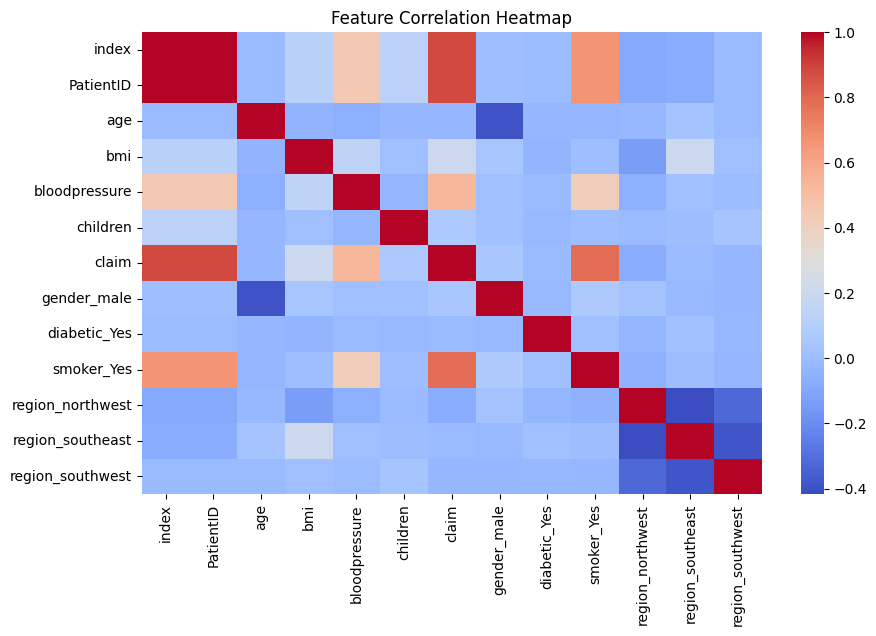

In [5]:
# 4. Correlation Heatmap
# =============================
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

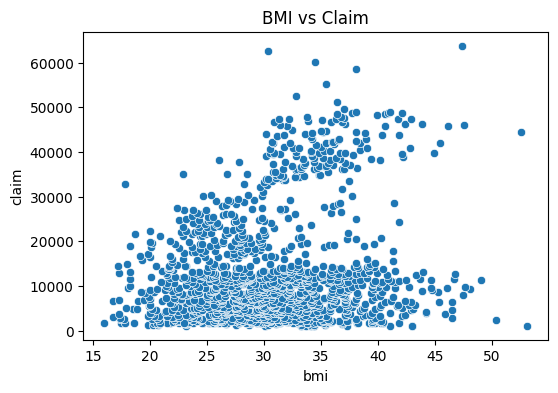

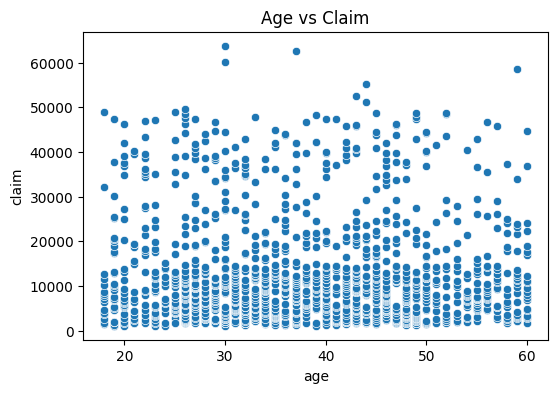

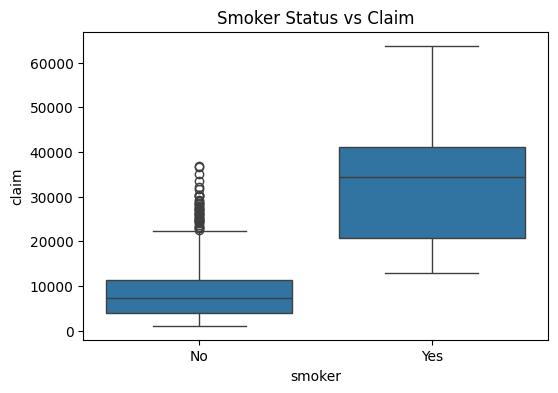

In [14]:
# 5. Visualizations for Specific Features

if 'bmi' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x='bmi', y='claim', data=df)
    plt.title("BMI vs Claim")
    plt.show()

if 'age' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x='age', y='claim', data=df)
    plt.title("Age vs Claim")
    plt.show()

if 'smoker' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='smoker', y='claim', data=df)
    plt.title("Smoker Status vs Claim")
    plt.show()

index            0
PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64
Mean Absolute Error: 3220.4352146019487
Root Mean Squared Error: 4470.9652580999345


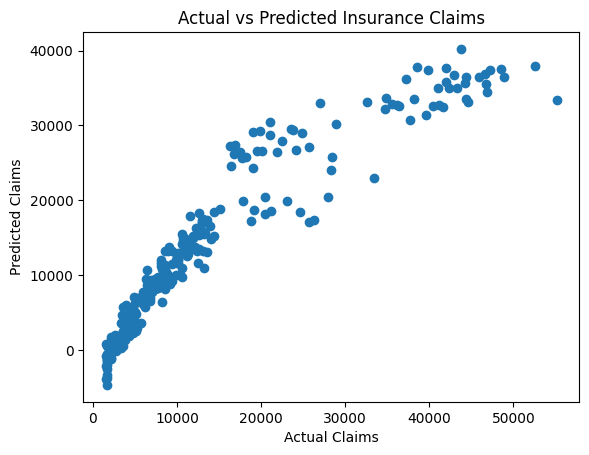

In [22]:
# 6. Check for missing values
print(df.isnull().sum())


# 7. Handle missing values
df = df.dropna()  # Simple method: drop rows with NaN
# OR: df = df.fillna(df.mean())  # Fill numeric NaN with column mean


# 8. Convert categorical columns to numeric
df = pd.get_dummies(df, drop_first=True)


# 9. Define features (X) and target (y)
X = df.drop(columns=["claim"])
y = df["claim"]


# 10. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 11. Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


# 12. Predictions
y_pred = model.predict(X_test)


# 13. Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

# 14. Visualization - Actual vs Predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Claims")
plt.ylabel("Predicted Claims")
plt.title("Actual vs Predicted Insurance Claims")
plt.show()